In [ ]:
"""
Web Content Extraction Module
This module provides functionality for fetching and parsing web page content.
"""

!pip install requests beautifulsoup4
!pip install firebase
import requests
from bs4 import BeautifulSoup

def retrieve_webpage_content(target_url):
    """
    Fetches and parses content from a specified URL.
    
    Args:
        target_url (str): The URL to fetch content from
        
    Returns:
        BeautifulSoup: Parsed HTML content or None if fetch fails
    """
    http_response = requests.get(target_url)
    if http_response.status_code == 200:
        parsed_content = BeautifulSoup(http_response.text, 'html.parser')
        return parsed_content
    else:
        return None


In [ ]:
"""
Word Frequency Analysis Module
This module handles the creation of word frequency indices from text content.
"""

import re

def create_word_frequency_index(parsed_content):
    """
    Creates a frequency index of words from parsed content.
    
    Args:
        parsed_content (BeautifulSoup): Parsed HTML content
        
    Returns:
        dict: Dictionary containing word frequencies
    """
    frequency_index = {}
    extracted_words = re.findall(r'\w+', parsed_content.get_text())
    
    for word in extracted_words:
        normalized_word = word.lower()
        frequency_index[normalized_word] = frequency_index.get(normalized_word, 0) + 1
    
    return frequency_index

In [ ]:
def filter_common_words(word_index):
    """
    Removes common stop words from the word frequency index.
    
    Args:
        word_index (dict): Dictionary of word frequencies
        
    Returns:
        dict: Filtered dictionary without stop words
    """
    common_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at'}
    
    for common_word in common_words:
        if common_word in word_index:
            del word_index[common_word]
            
    return word_index

In [ ]:
"""
Word Stemming Module
Applies stemming to normalize words to their root form.
"""

from nltk.stem import PorterStemmer

def normalize_word_forms(word_index):
    """
    Applies stemming to words in the frequency index.
    
    Args:
        word_index (dict): Dictionary of word frequencies
        
    Returns:
        dict: Dictionary with stemmed words as keys
    """
    word_stemmer = PorterStemmer()
    normalized_index = {}
    
    for word, frequency in word_index.items():
        root_form = word_stemmer.stem(word)
        normalized_index[root_form] = normalized_index.get(root_form, 0) + frequency
        
    return normalized_index

In [ ]:
def execute_word_search(search_query, word_index):
    """
    Searches for query terms in the word frequency index.
    
    Args:
        search_query (str): The search query string
        word_index (dict): Dictionary of word frequencies
        
    Returns:
        dict: Dictionary containing matches and their frequencies
    """
    query_terms = re.findall(r'\w+', search_query.lower())
    search_results = {}
    
    for term in query_terms:
        if term in word_index:
            search_results[term] = word_index[term]
            
    return search_results

In [ ]:
def webpage_content_search(target_url, search_query):
    """
    Main search engine function that processes a webpage and searches for query terms.
    
    Args:
        target_url (str): URL of the webpage to search
        search_query (str): Search query string
        
    Returns:
        dict: Search results with word frequencies or None if page fetch fails
    """
    webpage_content = retrieve_webpage_content(target_url)
    if webpage_content is None:
        return None
        
    word_index = create_word_frequency_index(webpage_content)
    word_index = filter_common_words(word_index)
    word_index = normalize_word_forms(word_index)
    search_results = execute_word_search(search_query, word_index)
    
    return search_results

In [ ]:
url = 'https://www.arianagrande.com/'
query = 'Ariana'
results = search_engine(url, query)
print(results)

{'ariana': 6}


In [ ]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'bird'
results = search_engine(url, query)
print(results)

{'bird': 574}


In [ ]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'birds wings'
results = search_engine(url, query)
print(results)

{}


In [ ]:
def search(query, index):
  stemmer = PorterStemmer()
  query_words = re.findall(r'\w+', query.lower())
  results = {}
  for word in query_words:
    word = stemmer.stem(word)
    if word in index:
      results[word] = index[word]
  return results

In [ ]:
url = 'https://en.wikipedia.org/wiki/Bird'
query = 'birds wings'
results = search_engine(url, query)
print(results)

{'bird': 574, 'wing': 25}


In [ ]:
rank=1
for word, count in results.items():
 rank = rank*1/count
rank = 1-rank


In [ ]:
url = 'https://www.arianagrande.com/'
query = 'shop buy ariana music grande video eternal sunshine brighter days'
results = search_engine(url, query)
print(results)

{'shop': 1, 'buy': 6, 'ariana': 6, 'music': 12, 'grand': 4, 'video': 3, 'etern': 4, 'sunshin': 4, 'brighter': 6, 'day': 6}


{'shop': 1, 'buy': 6, 'ariana': 6, 'music': 12, 'grand': 4, 'video': 3, 'etern': 4, 'sunshin': 4, 'brighter': 6, 'day': 6}
0.9999996651020233


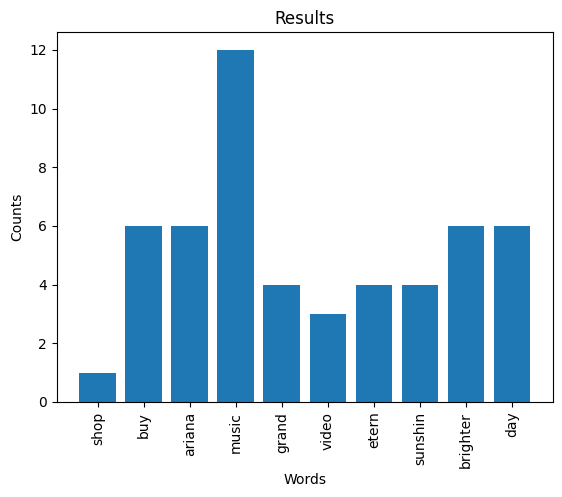

In [ ]:
from firebase import firebase
queries = 'shop buy ariana music grande video eternal sunshine brighter days'
db_link = "https://cloud7-38a0b-default-rtdb.firebaseio.com/"
FBconn = firebase.FirebaseApplication(db_link,None)
results = search_engine(url, queries)
print(results)

#add the results dictionary to the FB database
FBconn.put('/','results',results)
rank=1
for word, count in results.items():
  rank = rank*1/count
rank = 1-rank
print(rank)

# create a bar chart showing the number of appearences of each of the 10 words with set spacing between the words to make it readable
import matplotlib.pyplot as plt
words = list(results.keys())
counts = list(results.values())
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Results')
plt.show()